<a href="https://colab.research.google.com/github/jess22jess/EDP/blob/main/PolinLegenJess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

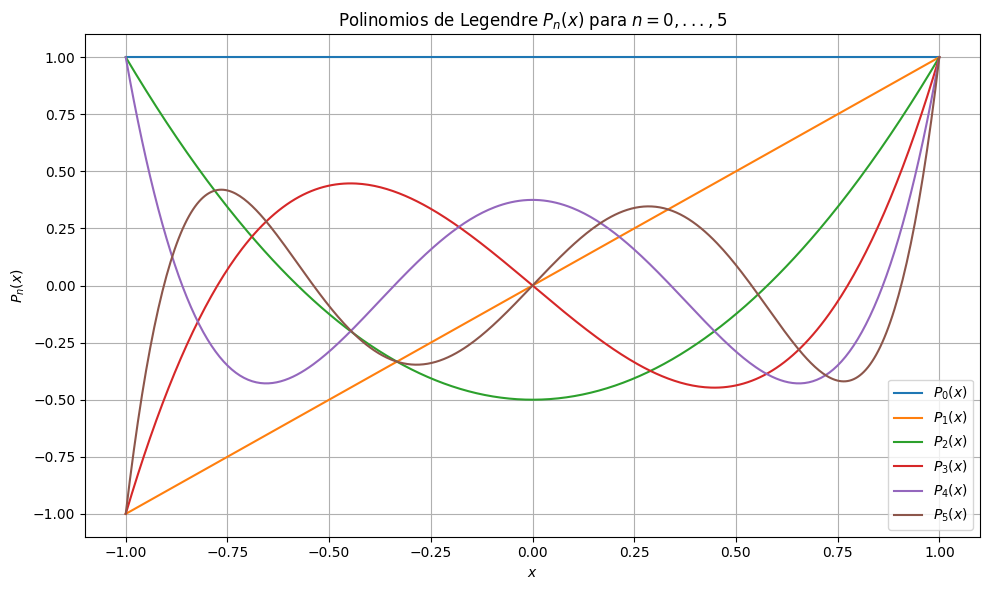

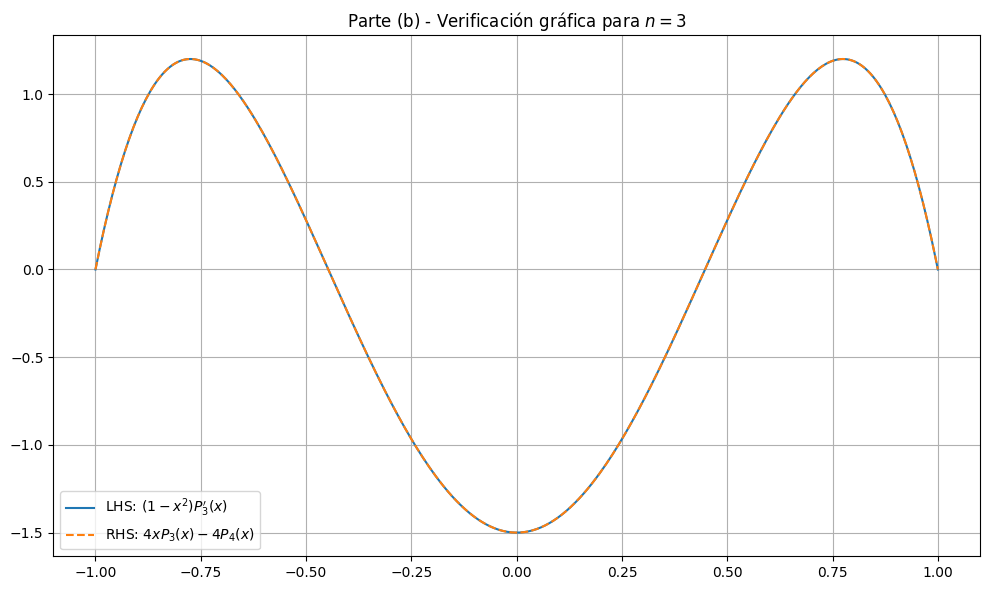


Parte (c) - Verificación algebraica para n = 3:
LHS: (1 - x^2) * P'_n(x)
(1 - x**2)*(15*x**2/2 - 3/2)

RHS: (n + 1) * x * P_n(x) - (n + 1) * P_{n+1}(x)
-35*x**4/2 + 15*x**2 + 4*x*(5*x**3/2 - 3*x/2) - 3/2

Simplificación de LHS - RHS:
0
✅ Se verifica la identidad.

Parte (d) - Verificación algebraica para n = 3:
Expresión completa:
35*x**4/2 - 21*x**2/2 - 7*x*(5*x**3/2 - 3*x/2)

Simplificación:
0
✅ Se verifica la identidad de recurrencia.

Parte (e) - Verificación detallada de la fórmula de Rodrigues:

--- n = 0 ---
Rodrigues:
1
P_n(x):
1
Diferencia simplificada:
0
✅ Se cumple la fórmula de Rodrigues.

--- n = 1 ---
Rodrigues:
x
P_n(x):
x
Diferencia simplificada:
0
✅ Se cumple la fórmula de Rodrigues.

--- n = 2 ---
Rodrigues:
(3*x**2 - 1)/2
P_n(x):
3*x**2/2 - 1/2
Diferencia simplificada:
0
✅ Se cumple la fórmula de Rodrigues.

--- n = 3 ---
Rodrigues:
x*(5*x**2 - 3)/2
P_n(x):
5*x**3/2 - 3*x/2
Diferencia simplificada:
0
✅ Se cumple la fórmula de Rodrigues.

--- n = 4 ---
Rodrigues:
(8*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, simplify, legendre, factorial
from sympy.abc import x
from sympy.utilities.lambdify import lambdify

# Parte (a) - Graficar los polinomios de Legendre P_n(x) para n = 0,...,5
x_vals = np.linspace(-1, 1, 400)
plt.figure(figsize=(10, 6))

for n in range(6):
    Pn = legendre(n, x)  # Obtener el polinomio de Legendre P_n(x)
    f = lambdify(x, Pn, modules=["numpy"])  # Convertirlo a función numérica
    y_vals = np.array(f(x_vals))
    if y_vals.ndim == 0:
        y_vals = np.full_like(x_vals, fill_value=y_vals)
    plt.plot(x_vals, y_vals, label=f'$P_{n}(x)$')

plt.title("Polinomios de Legendre $P_n(x)$ para $n=0,...,5$")
plt.xlabel("$x$")
plt.ylabel("$P_n(x)$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Parte (b) - Verificación gráfica de la identidad (1 - x²)P'_n(x) = (n + 1)xP_n(x) - (n + 1)P_{n+1}(x) para n = 3
n = 3
Pn = legendre(n, x)
Pn1 = legendre(n + 1, x)
dPn = diff(Pn, x)

lhs = (1 - x**2) * dPn
rhs = (n + 1) * x * Pn - (n + 1) * Pn1

lhs_f = lambdify(x, lhs, 'numpy')
rhs_f = lambdify(x, rhs, 'numpy')

plt.figure(figsize=(10, 6))
plt.plot(x_vals, lhs_f(x_vals), label='LHS: $(1 - x^2)P_3\'(x)$')
plt.plot(x_vals, rhs_f(x_vals), '--', label='RHS: $4xP_3(x) - 4P_4(x)$')
plt.title("Parte (b) - Verificación gráfica para $n=3$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Parte (c) - Verificación algebraica de la misma identidad para n = 3
print("\nParte (c) - Verificación algebraica para n = 3:")
print("LHS: (1 - x^2) * P'_n(x)")
print(lhs)
print("\nRHS: (n + 1) * x * P_n(x) - (n + 1) * P_{n+1}(x)")
print(rhs)

diff_expr = simplify(lhs - rhs)
print("\nSimplificación de LHS - RHS:")
print(diff_expr)
if diff_expr == 0:
    print("✅ Se verifica la identidad.")
else:
    print("❌ No se verifica la identidad.")

# Parte (d) - Verificación de la identidad de recurrencia:
# (n + 1)P_{n+1}(x) - (2n + 1)xP_n(x) + nP_{n-1}(x) = 0
print("\nParte (d) - Verificación algebraica para n = 3:")
Pn1 = legendre(n + 1, x)
Pn = legendre(n, x)
Pn_1 = legendre(n - 1, x)
expr_d = (n + 1) * Pn1 - (2 * n + 1) * x * Pn + n * Pn_1

print("Expresión completa:")
print(expr_d)
simplified_d = simplify(expr_d)
print("\nSimplificación:")
print(simplified_d)
if simplified_d == 0:
    print("✅ Se verifica la identidad de recurrencia.")
else:
    print("❌ No se verifica la identidad de recurrencia.")

# Parte (e) - Verificación de la fórmula de Rodrigues para P_n(x)
print("\nParte (e) - Verificación detallada de la fórmula de Rodrigues:")
for n in range(6):
    Rodrigues = (1 / (2**n * factorial(n))) * diff((x**2 - 1)**n, x, n)
    Pn = legendre(n, x)
    print(f"\n--- n = {n} ---")
    print("Rodrigues:")
    print(Rodrigues)
    print("P_n(x):")
    print(Pn)
    difference = simplify(Rodrigues - Pn)
    print("Diferencia simplificada:")
    print(difference)
    if difference == 0:
        print("✅ Se cumple la fórmula de Rodrigues.")
    else:
        print("❌")
